In [2]:
import torch
import cv2
import numpy as np
import matplotlib as plt
import pickle as pkl

In [3]:
with open("../tests/test_InterHand26M/sample.pkl", "rb") as f:
    sample = pkl.load(f)

In [14]:
inputs = sample["inputs"]
targets = sample["targets"]
meta_info = sample["meta_info"]

mean = torch.tensor([0.485, 0.456, 0.406])
std = torch.tensor([0.229, 0.224, 0.225])

In [26]:
origin_img = (inputs['img'] * std[:, None, None]) + mean[:, None, None] - 0.4
cv2.imwrite(
    "../tests/test_InterHand26M/origin_img.png",
    (origin_img.permute(1,2,0).numpy() * 255).astype(np.uint8)
)

True

In [21]:
meta_info['rhand_bbox_valid'], meta_info['lhand_bbox_valid']

(0.0, 1.0)

---

In [1]:
from sl_vit2.dataset import Ego4DHandImage

In [2]:
dataset = Ego4DHandImage(
    r"/mnt/qnap/data/datasets/ego4d_hand_sep60",
    224,
    default_augment=False,
    custom_transform=None
)

In [3]:
import matplotlib.pyplot as plt

print(f"len={len(dataset)}")

dataset[0].shape

len=1072575


torch.Size([3, 224, 224])

In [4]:
import numpy as np

def tensor_img_to_numpy(img):
    img_np = img.detach().cpu().numpy()
    img_np = img_np.transpose(1, 2, 0)
    img_np = (255 * img_np).astype(np.uint8)
    return img_np

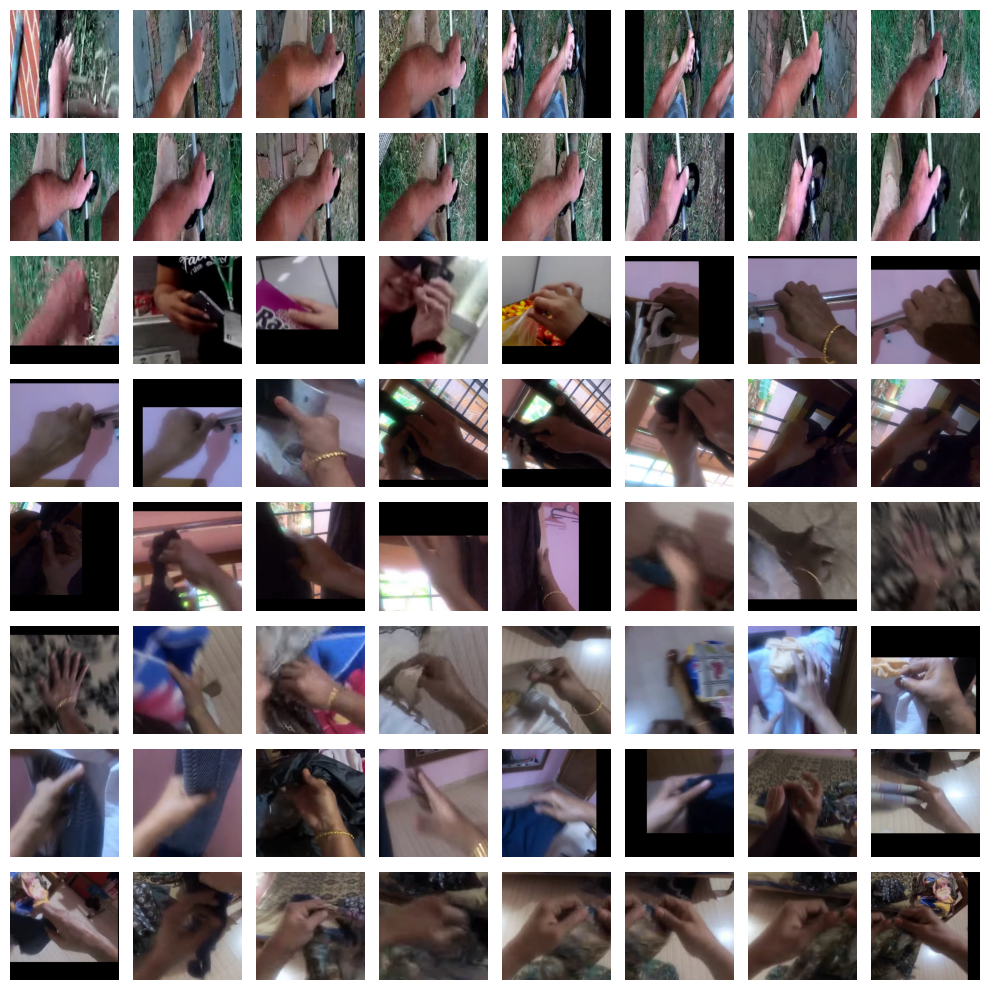

In [5]:
N = 8
fig, axes = plt.subplots(N, N, figsize=(10, 10))

for i in range(N**2):
    # 获取当前图像
    image = dataset[1280 + i]
    image = tensor_img_to_numpy(image)

    # 计算当前图像在子图中的位置
    row = i // N
    col = i % N

    # 显示图像
    axes[row, col].imshow(image)
    axes[row, col].axis('off')  # 关闭坐标轴

# 调整子图间距
plt.tight_layout()

# 显示图像
plt.show()

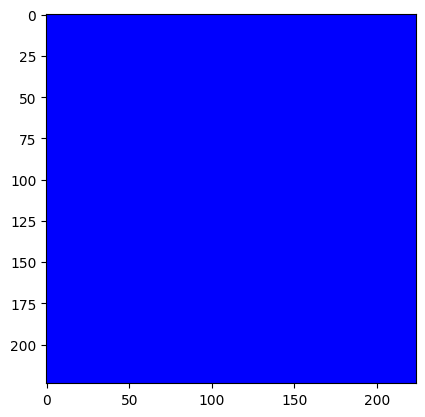

In [11]:
red = np.ndarray(shape=(224, 224, 3), dtype=np.uint8)
red[:, :, 0] = 255
red[:, :, 1:] = 0

import cv2
cv2.imwrite("red.jpg", red[:, :, ::-1])

from turbojpeg import TurboJPEG
decoder = TurboJPEG()

with open("/data_1/renkaiwen/TI-ViT/scripts/red.jpg", "rb") as f:
    from_file = decoder.decode(f.read())

plt.imshow(from_file)